
<h2 align='center'> MÔN HỌC: KỸ NGHỆ TRI THỨC VÀ HỌC MÁY (7080510) </h2>

---
* Giảng viên: Đặng Văn Nam
* Email: dangvannam@humg.edu.n

---
* Họ tên sinh viên:
* Mã sinh viên:
* Lớp/Nhóm môn học:
* Email:

---

## CHƯƠNG 4: HỌC KHÔNG GIÁM SÁT - UNSUPERVISED LEARNING
---
Nếu dữ liệu huấn luyện chỉ bao gồm các dữ liệu đầu vào x mà không có đầu ra tương ứng. Các thuật toán machine learning có thể không dự đoán được đầu ra nhưng vẫn trích xuất được những thông tin quan trọng dựa trên mối liên quan giữa các điểm dữ liệu. Các thuật toán trong nhóm này được gọi là học không giám sát (unsupervised learning).

* Học máy có giám sát (Supervised learning): Dự đoán đầu ra (label) của một dữ liệu mới (new sample) dựa trên các cặp (sample, label) đã biết từ trước.
* Học máy không giám sát (Unsupervised learning): chỉ có dữ liệu đầu vào (sample) mà không có nhãn (label).

<img src='pic/pic1.jpg' width='700px'>

– Mục đích là khai phá dữ liệu để tìm ra các cấu trúc nội tại trong dữ liệu để thực hiện một công việc nào đó, ví dụ như phân nhóm (clustering) hoặc giảm số chiều của dữ liệu (dimension reduction) để thuận tiện trong việc lưu trữ và tính toán.


## A. Phân cụm khách hàng (Customer Segmentation) với KMeans
---

Từ tập dữ liệu thông tin của 200 khách hàng của trung tâm thương mại phân chia các khách hàng đấy vào những phân khúc (cụm) khách hàng phù hợp

File dữ liệu sử dụng:

**Mall_Custemers.csv**: Tập dữ liệu gồm 200 khách hàng với một số thuộc tính:
1. Gender: Giới tính của khách hàng
2. Age: Tuổi của khách hàng
3. Income: Thu nhập hàng năm của khách hàng (k$)
4. Spending score: Điểm chi tiêu do trung tâm mua sắm chỉ định dựa trên hành vi chi tiêu của khách hàng với thang điểm từ 1-100

### 1.Tải và quan sát tập dữ liệu

In [1]:
# Khai báo thư viện
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Đọc tập dữ liệu
path = "data/Mall_Customers.csv"
df = pd.read_csv(path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [3]:
#Hiển thị 5 bản ghi đầu tiên:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#Quan sát các đặc trưng thống kê:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### 1.1 Quan sát thuộc tính tuổi của khách hàng
---
Lập biểu đồ quan sát sự phân bổ tuổi của khách hàng

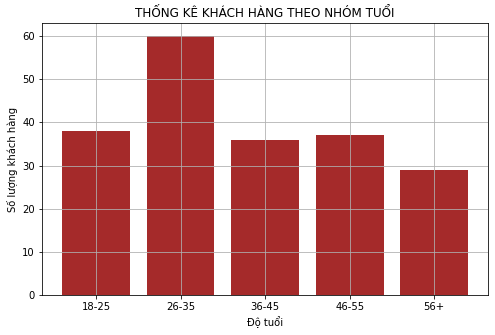

In [5]:
#Vẽ biểu đồ cột quan sát khách hàng theo từng nhóm tuổi

age18_25 = df.Age[(df.Age <= 25) & (df.Age >= 18)]
age26_35 = df.Age[(df.Age <= 35) & (df.Age >= 26)]
age36_45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
age46_55 = df.Age[(df.Age <= 55) & (df.Age >= 46)]
age55above = df.Age[df.Age >= 56]

x = ["18-25","26-35","36-45","46-55","56+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(8,5))
plt.bar(x, y, color='brown')
plt.title("THỐNG KÊ KHÁCH HÀNG THEO NHÓM TUỔI")
plt.xlabel("Độ tuổi")
plt.ylabel("Số lượng khách hàng")
plt.grid(True)
plt.show()

Độ tuổi của khách hàng tối thiểu là 18, tối đa là 30, tuổi trung bình là 38,85 và độ tuổi chủ yếu là từ 26 - 35 tuổi

## 1.2 Quan sát thuộc tính thu nhập hàng năm của khách hàng
---
Vẽ biểu đồ hộp và biểu đồ cột để thấy sự phân bố thu nhập hàng năm của khách hàng

In [6]:
#Quan sát thống kê thuộc tính thu nhập:
df['Annual Income (k$)'].describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64

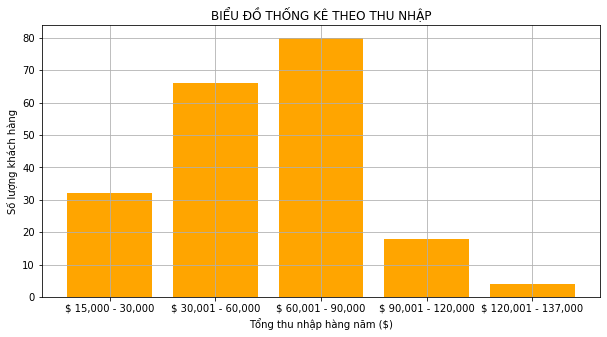

In [7]:
#Trực quan hóa dữ liệu theo từng nhóm thu nhập:
ai0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 15) & (df["Annual Income (k$)"] <= 30)]
ai31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ai61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ai91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ai121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 137)]

aix = ["$ 15,000 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 137,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(10,5))
plt.bar(aix, aiy, color='orange')
plt.title("BIỂU ĐỒ THỐNG KÊ THEO THU NHẬP")
plt.xlabel("Tổng thu nhập hàng năm ($)")
plt.ylabel("Số lượng khách hàng")
plt.grid(True)
plt.show()

Như vậy thu nhập hàng năm của khách hàng phần lớn trong khoảng từ 60000 - 90000. Thu nhập thấp nhất là 15000 và cao nhất là 137000 trung bình là 60560

### 1.3 Quan sát thuộc tính điểm chi tiêu của khách hàng
---
* Thuộc tính điểm chi tiêu của khách hàng được tính dựa trên hành vi mua sắm tại trung tâm trên thang điểm 1-100.

* Thuộc tính này cho biết khả năng chi tiêu cho các mặt hàng của trung tâm thương mại. Điểm chi tiêu càng cao khách hàng càng tiêu nhiều tiền vào việc mua sắm ở trung tâm thương mại.

In [8]:
#Quan sát thống kê thuộc tính điểm chi tiêu:
df['Spending Score (1-100)'].describe()

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: Spending Score (1-100), dtype: float64

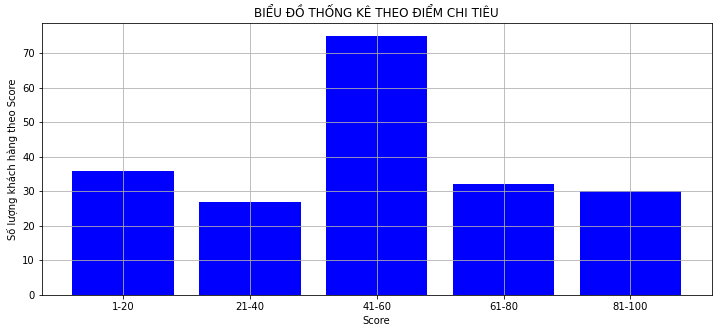

In [9]:
#Trực quan hóa dữ liệu theo từng nhóm dựa vào điểm chi tiêu:
ss1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 20)]
ss21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)]
ss41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)]
ss61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)]
ss81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(12,5))
plt.bar(ssx,ssy, color='blue')
plt.title("BIỂU ĐỒ THỐNG KÊ THEO ĐIỂM CHI TIÊU")
plt.xlabel("Score")
plt.ylabel("Số lượng khách hàng theo Score")
plt.grid(True)
plt.show()

Như vậy điểm chi tiêu của khách hàng phần lớn trong khoảng từ 41-60 điểm. Điểm thấp nhất là 1 và cao nhất là 99 trung bình là 50,2

### 1.4 Quan sát thuộc tính giới tính
---

Female    112
Male       88
Name: Gender, dtype: int64


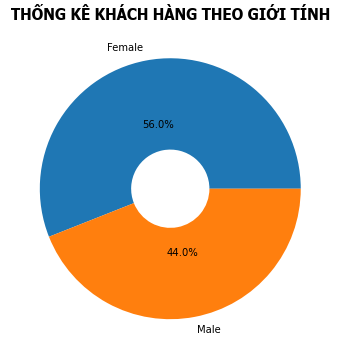

In [10]:
genders = df.Gender.value_counts()
print(genders)

plt.figure(figsize=(8,6))
plt.subplot()
plt.pie(genders.values,
        labels=genders.index,
        autopct='%1.1f%%', 
        pctdistance=0.5,
        wedgeprops=dict(width=0.7))
plt.title('THỐNG KÊ KHÁCH HÀNG THEO GIỚI TÍNH', fontdict={'fontname':'Tahoma',
                                                    'fontweight':'bold',
                                                   'fontsize':15})
plt.show()

Khách hàng là nữ giới đông hơn nam giới. Nữ giới chiếm 56% và nam giới là 44%

# 2.Tiến hành phân cụm tập dữ liệu

## 2.1 Sử dụng phương pháp khửu tay tìm số cụm tối ưu

In [11]:
#Sử dụng 3 thuộc tính Age, Income, Score để phân cụm dữ liệu
data_cluster = df.iloc[:,2:]
data_cluster.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


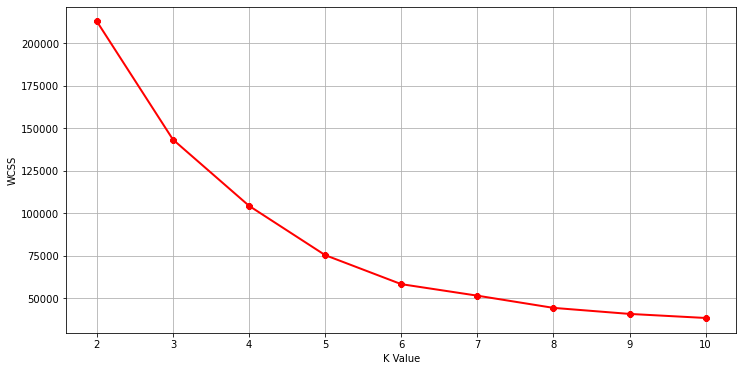

In [12]:
from sklearn.cluster import KMeans
wcss = []
#Thử số cụm (n_clusters) thay đổi từ 1 đến 10
for k in range(2,11):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(df.iloc[:,2:])
    wcss.append(kmeans.inertia_)

#Trực quan hóa lên biểu đồ:
plt.figure(figsize=(12,6))    
plt.grid(True)
plt.plot(range(2,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(2,11,1))
plt.ylabel("WCSS")
plt.show()

Từ biểu đồ trên theo phương pháp khửu tay ta thấy số lượng cụm n = 5 tốt nhất

## 2.2 Tiến hành phân cụm dữ liệu theo số lượng cụm phía trên

Với k=5. Phân chia tập dữ liệu thành 5 cụm

In [13]:
from sklearn.cluster import KMeans

#Thực hiện phân thành 5 cụm, các tham số khác sử dụng mặc định
model_km = KMeans(n_clusters=5)

#Liệt kê các tham số của mô hình
model_km.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 5,
 'n_init': 10,
 'n_jobs': 'deprecated',
 'precompute_distances': 'deprecated',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

Các tham số của model: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

1. n_clusters: xác định số cụm cần phần nhóm (Default=8)
2. init: thuật toán khởi tạo (k-means++, random)

In [14]:
model_km.fit_predict(df.iloc[:,2:])

#Tạo cột Cluster để cho biết mẫu thuộc cụm nào
df["Cluster"] = model_km.labels_
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,4
2,3,Female,20,16,6,0
3,4,Female,23,16,77,4
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,3
197,198,Male,32,126,74,1
198,199,Male,32,137,18,3


2    79
1    39
3    36
0    23
4    23
Name: Cluster, dtype: int64


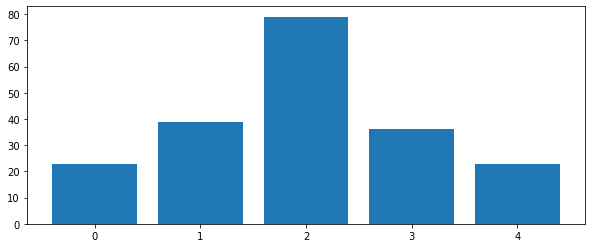

In [15]:
#Thống kê số lượng khách hàng theo mỗi cụm:
sum_cluster = df.Cluster.value_counts()
print(sum_cluster)

#Trực quan hóa dữ liệu
plt.figure(figsize=(10,4))
plt.bar(sum_cluster.index, sum_cluster.values)
plt.show()


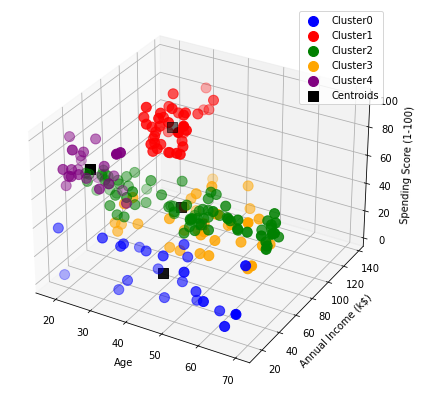

In [16]:
#Trực quan hóa phân cụm
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.Cluster == 0], df["Annual Income (k$)"][df.Cluster == 0], df["Spending Score (1-100)"][df.Cluster == 0], c='blue', s=100,label='Cluster0')
ax.scatter(df.Age[df.Cluster == 1], df["Annual Income (k$)"][df.Cluster == 1], df["Spending Score (1-100)"][df.Cluster == 1], c='red', s=100,label='Cluster1')
ax.scatter(df.Age[df.Cluster == 2], df["Annual Income (k$)"][df.Cluster == 2], df["Spending Score (1-100)"][df.Cluster == 2], c='green', s=100,label='Cluster2')
ax.scatter(df.Age[df.Cluster == 3], df["Annual Income (k$)"][df.Cluster == 3], df["Spending Score (1-100)"][df.Cluster == 3], c='orange', s=100,label='Cluster3')
ax.scatter(df.Age[df.Cluster == 4], df["Annual Income (k$)"][df.Cluster == 4], df["Spending Score (1-100)"][df.Cluster == 4], c='purple', s=100,label='Cluster4')
ax.scatter(model_km.cluster_centers_[:, 0], 
           model_km.cluster_centers_[:, 1],
           model_km.cluster_centers_[:, 2], 
           color = 'black', label = 'Centroids',s=100,marker='s')
#ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [17]:
#Vị trí tâm của các cụm
np.round(model_km.cluster_centers_,1)

array([[45.2, 26.3, 20.9],
       [32.7, 86.5, 82.1],
       [43.1, 55.3, 49.6],
       [40.7, 87.8, 17.6],
       [25.5, 26.3, 78.6]])

In [18]:
#Tổng bình phương khoảng cách từ các mẫu tới trung tâm cụm gần nhất.
model_km.inertia_

75350.77917248776

# 3.Kết quả thu được
---
## Nhóm 0:

In [19]:
#Danh sách khách hàng nhóm 0
cluster_0 = df[df.Cluster== 0]
cluster_0.reset_index(inplace=True)
cluster_0[['CustomerID','Gender','Age','Annual Income (k$)','Spending Score (1-100)', 'Cluster']]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,0
1,3,Female,20,16,6,0
2,5,Female,31,17,40,0
3,7,Female,35,18,6,0
4,9,Male,64,19,3,0
5,11,Male,67,19,14,0
6,13,Female,58,20,15,0
7,15,Male,37,20,13,0
8,17,Female,35,21,35,0
9,19,Male,52,23,29,0


In [20]:
#Đặc trưng thống kê của thuộc tính phân cụm khách hàng nhóm 0
cluster_0[['Age','Annual Income (k$)','Spending Score (1-100)']].describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,23.000000,23.000000,23.000000
mean,45.217391,26.304348,20.913043
std,13.228607,7.893811,13.017167
min,19.000000,15.000000,3.000000
25%,35.500000,19.500000,9.500000
50%,46.000000,25.000000,17.000000
75%,53.500000,33.000000,33.500000
max,67.000000,39.000000,40.000000


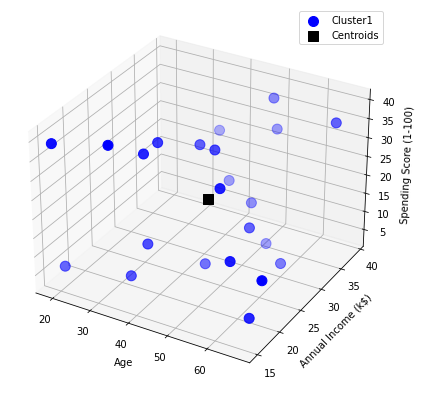

In [21]:
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cluster_0['Age'], cluster_0["Annual Income (k$)"], cluster_0["Spending Score (1-100)"], c='blue', s=100,label='Cluster1')
ax.scatter(model_km.cluster_centers_[0, 0], 
           model_km.cluster_centers_[0, 1],
           model_km.cluster_centers_[0, 2], 
           color = 'black', label = 'Centroids',s=100,marker=',')
#ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.legend()
plt.show()

**Đặc trưng của khách hàng Nhóm 0 là gì?**





## Nhóm 1
---

In [22]:
#Danh sách khách hàng nhóm 1
cluster_1=df[df.Cluster== 1]
cluster_1.reset_index(inplace=True)
cluster_1[['CustomerID','Gender','Age','Annual Income (k$)','Spending Score (1-100)','Cluster']]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,124,Male,39,69,91,1
1,126,Female,31,70,77,1
2,128,Male,40,71,95,1
3,130,Male,38,71,75,1
4,132,Male,39,71,75,1
5,134,Female,31,72,71,1
6,136,Female,29,73,88,1
7,138,Male,32,73,73,1
8,140,Female,35,74,72,1
9,142,Male,32,75,93,1


In [23]:
#Đặc trưng thống kê của thuộc tính phân cụm khách hàng nhóm 1
cluster_1[['Age','Annual Income (k$)','Spending Score (1-100)']].describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,39.000000,39.000000,39.000000
mean,32.692308,86.538462,82.128205
std,3.728650,16.312485,9.364489
min,27.000000,69.000000,63.000000
25%,30.000000,75.500000,74.500000
50%,32.000000,79.000000,83.000000
75%,35.500000,95.000000,90.000000
max,40.000000,137.000000,97.000000


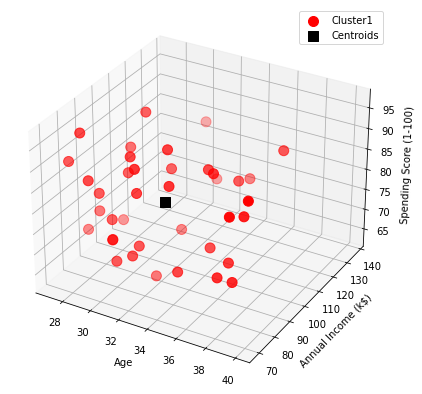

In [24]:
#Trực quan hóa
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cluster_1["Age"], cluster_1["Annual Income (k$)"], cluster_1["Spending Score (1-100)"], c='red', s=100,label='Cluster1')
ax.scatter(model_km.cluster_centers_[1, 0], 
           model_km.cluster_centers_[1, 1],
           model_km.cluster_centers_[1, 2], color = 'black', label = 'Centroids',s=100,marker=',')
#ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.legend()
plt.show()

**Đặc trưng của khách hàng Nhóm 1 là gì?**




## Nhóm 2:
---

In [25]:
#Danh sách khách hàng nhóm 2
cluster_2 = df[df.Cluster== 2]
cluster_2.reset_index(inplace=True)
cluster_2[['CustomerID','Gender','Age','Annual Income (k$)','Spending Score (1-100)','Cluster']]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,47,Female,50,40,55,2
1,48,Female,27,40,47,2
2,49,Female,29,40,42,2
3,50,Female,31,40,42,2
4,51,Female,49,42,52,2
...,...,...,...,...,...,...
74,121,Male,27,67,56,2
75,122,Female,38,67,40,2
76,123,Female,40,69,58,2
77,127,Male,43,71,35,2


In [26]:
#Đặc trưng thống kê của thuộc tính phân cụm khách hàng nhóm 2
cluster_2[['Age','Annual Income (k$)','Spending Score (1-100)']].describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,79.000000,79.000000,79.000000
mean,43.088608,55.291139,49.569620
std,16.478572,8.710665,6.242295
min,18.000000,40.000000,35.000000
25%,27.000000,48.000000,44.500000
50%,47.000000,54.000000,50.000000
75%,54.500000,62.000000,55.000000
max,70.000000,76.000000,60.000000


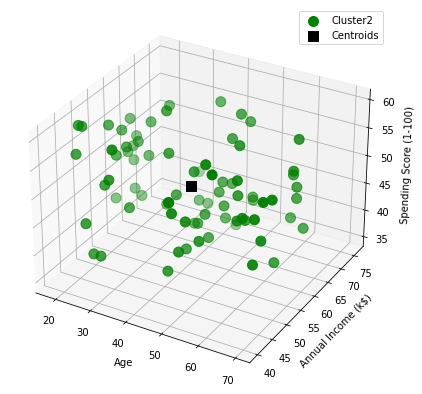

In [27]:
#Trực quan hóa nhóm 2
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cluster_2["Age"], cluster_2["Annual Income (k$)"], cluster_2["Spending Score (1-100)"], c='green', s=100,label='Cluster2')
ax.scatter(model_km.cluster_centers_[2, 0], 
           model_km.cluster_centers_[2, 1],
           model_km.cluster_centers_[2, 2], color = 'black', label = 'Centroids',s=100,marker=',')
#ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.legend()
plt.show()

**Đặc trưng của khách hàng Nhóm 2 là gì?**

## Nhóm 3:
---

In [28]:
#Danh sách khách hàng nhóm 2
cluster_3 = df[df.Cluster== 3]
cluster_3.reset_index(inplace=True)
cluster_3[['CustomerID','Gender','Age','Annual Income (k$)','Spending Score (1-100)','Cluster']]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,125,Female,23,70,29,3
1,129,Male,59,71,11,3
2,131,Male,47,71,9,3
3,133,Female,25,72,34,3
4,135,Male,20,73,5,3
5,137,Female,44,73,7,3
6,139,Male,19,74,10,3
7,141,Female,57,75,5,3
8,145,Male,25,77,12,3
9,147,Male,48,77,36,3


In [29]:
#Đặc trưng thống kê của thuộc tính phân cụm khách hàng nhóm 3
print(cluster_3[['Age','Annual Income (k$)','Spending Score (1-100)']].describe())

             Age  Annual Income (k$)  Spending Score (1-100)
count  36.000000           36.000000               36.000000
mean   40.666667           87.750000               17.583333
std    11.496583           16.387059               10.204691
min    19.000000           70.000000                1.000000
25%    34.000000           77.000000               10.000000
50%    41.500000           83.000000               16.000000
75%    47.250000           97.250000               24.500000
max    59.000000          137.000000               39.000000


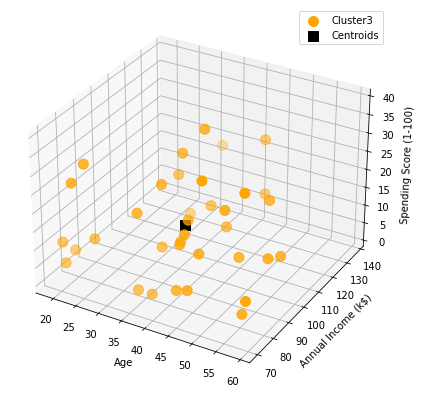

In [30]:
#Trực quan hóa nhóm 3
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cluster_3['Age'], cluster_3["Annual Income (k$)"], cluster_3["Spending Score (1-100)"], c='orange', s=100,label='Cluster3')
ax.scatter(model_km.cluster_centers_[3, 0],
           model_km.cluster_centers_[3, 1],
           model_km.cluster_centers_[3, 2], 
           color = 'black', label = 'Centroids',s=100,marker=',')
#ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.legend()
plt.show()

**Đặc trưng của khách hàng Nhóm 3 là gì?**




## Nhóm 4:
---

In [31]:
#Danh sách khách hàng nhóm 4
cluster_4 = df[df.Cluster== 4]
cluster_4.reset_index(inplace=True)
cluster_4[['CustomerID','Gender','Age','Annual Income (k$)','Spending Score (1-100)','Cluster']]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,2,Male,21,15,81,4
1,4,Female,23,16,77,4
2,6,Female,22,17,76,4
3,8,Female,23,18,94,4
4,10,Female,30,19,72,4
5,12,Female,35,19,99,4
6,14,Female,24,20,77,4
7,16,Male,22,20,79,4
8,18,Male,20,21,66,4
9,20,Female,35,23,98,4


In [32]:
#Đặc trưng thống kê của thuộc tính phân cụm khách hàng nhóm 4
print(cluster_4[['Age','Annual Income (k$)','Spending Score (1-100)']].describe())

             Age  Annual Income (k$)  Spending Score (1-100)
count  23.000000           23.000000               23.000000
mean   25.521739           26.304348               78.565217
std     5.273170            7.893811               10.953729
min    18.000000           15.000000               61.000000
25%    21.500000           19.500000               73.000000
50%    24.000000           25.000000               77.000000
75%    30.000000           33.000000               84.500000
max    35.000000           39.000000               99.000000


NameError: name 'km' is not defined

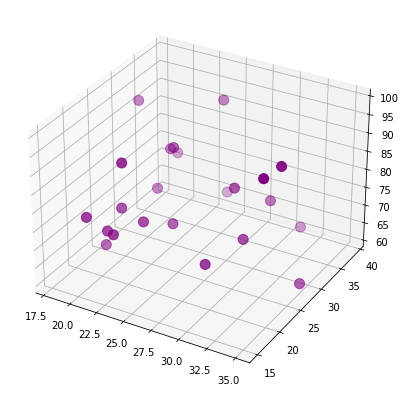

In [33]:
# Trực quan hóa nhóm 4
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cluster_4['Age'], cluster_4["Annual Income (k$)"], cluster_4["Spending Score (1-100)"], c='purple', s=100,label='Cluster4')
ax.scatter(km.cluster_centers_[4, 0], km.cluster_centers_[4, 1],km.cluster_centers_[4, 2], color = 'black', label = 'Centroids',s=100,marker=',')
#ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.legend()
plt.show()

**Đặc trưng của khách hàng Nhóm 4 là gì?**


**==>>>> Như vậy từ kết quả phân nhóm trên, trung tâm thương mại hoàn toàn đưa ra những chiến lược khuyến mại hoặc thu hút khách hàng riêng biệt phù hợp cho từng nhóm**


## THỰC HÀNH 10
---
Mô tả tập dữ liệu: Data_seles_Excercise.csv. Dữ liệu mua hàng của 200 MiniMart với một nhà phân phối hàng hóa trong năm 2019. Trong đó:
* Cột No: Mã của MiniMart
* Cột City: Ký hiệu khu vực đặt MiniMart
* Cột Distance: Khoảng cách từ MiniMart tới nhà phân phối.
* Cột Grocery: Số tiền MiniMart đã dùng để mua hàng tạp hóa trong năm 2019.
* Cột Milk: Số tiền mà MiniMart đã dùng để mua sữa từ nhà phân phối trong năm 2019

**YÊU CẦU:**
Sử dụng thuật toán phân cụm Kmeans cho tập dữ liệu với 2 thuộc tính phân cụm: Grocery, Milk:
1. Xác định số cụm tối ưu.
2. Thực hiện phân cụm dữ liệu với số cụm tối ưu đã chỉ ra ở yêu cầu 1. Trực quan hóa, Liệt kê danh sách MiniMart theo từng cụm và cho nhận xét.


In [ ]:
#{SINH VIÊN THỰC HIỆN TẠI ĐÂY}








